In [1]:
import sympy
# http://www.sympygamma.com/

In [2]:
# from http://iamtrask.github.io/2015/07/12/basic-python-network/

import itertools
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# sigmoid function
def nonlin(x, deriv=False):
    if (deriv == True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

# input
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

print "X:\n", X

# output
y = np.array([[0,0,1,1]]).T # transpose to make column vector

print "\ny:\n", y

X:
[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]

y:
[[0]
 [0]
 [1]
 [1]]


In [3]:
# random initialization of weights (mean == 0)
np.random.seed(7)
# (b - a) * random_sample() + a, [a, b):

#weights = 2 * np.round(np.random.random((3,1)), 2) - 1
weights = np.random.standard_normal((3,1))
print "randomly initialized weights:\n", weights

randomly initialized weights:
[[ 1.6905257 ]
 [-0.46593737]
 [ 0.03282016]]


$$\textbf{X} \cdot \textbf{w} = \textbf{v}$$

$$\textbf{l} = \frac{1}{1+e^{-\textbf{v}}}$$

$$\epsilon = \textbf{y} - \textbf{l}$$

$$l \cdot (1 - l)$$


-- ITERATION 0 --
weights (w) =
[[ 11.649]
 [ -0.205]
 [ -5.62 ]]

(layer 0)
X * w =
[[-5.62 ]
 [-5.825]
 [ 6.029]
 [ 5.824]]

(layer 1)
sigmoid(X * w)=
[[ 0.004]
 [ 0.003]
 [ 0.998]
 [ 0.997]]

(error layer)
y - sigmoid(X * w) = 
[[-0.004]
 [-0.003]
 [ 0.002]
 [ 0.003]]

d/dx sigmoid(X * w) =
[[ 0.004]
 [ 0.003]
 [ 0.002]
 [ 0.003]]

(y - sigmoid(X * w)) * (d/dx sigmoid(X * w))=
[[ -1.00000000e-05]
 [ -1.00000000e-05]
 [  1.00000000e-05]
 [  1.00000000e-05]]

np.dot(layer0.T, layer1_delta) =
[[  1.00000000e-05]
 [  0.00000000e+00]
 [ -1.00000000e-05]]

weights += np.dot(layer0.T, layer1_delta)=
[[ 11.64919722]
 [ -0.20489527]
 [ -5.62017609]]

-- ITERATION 10 --
weights (w) =
[[ 11.649]
 [ -0.205]
 [ -5.62 ]]

(layer 0)
X * w =
[[-5.62 ]
 [-5.825]
 [ 6.029]
 [ 5.824]]

(layer 1)
sigmoid(X * w)=
[[ 0.004]
 [ 0.003]
 [ 0.998]
 [ 0.997]]

(error layer)
y - sigmoid(X * w) = 
[[-0.004]
 [-0.003]
 [ 0.002]
 [ 0.003]]

d/dx sigmoid(X * w) =
[[ 0.004]
 [ 0.003]
 [ 0.002]
 [ 0.003]]

(y - sig

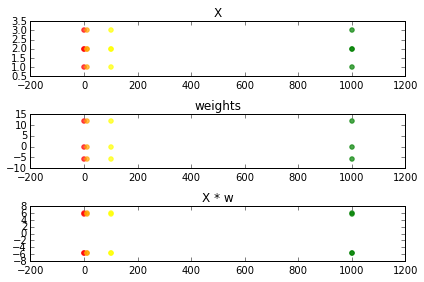

In [11]:
checkpoints = [0, 10, 100, 1000, 1000, 10000]
colors = itertools.cycle(['red', 'orange', 'yellow', 'green', 'blue', 'purple'])

for i in xrange(10000):
    
    # forward propagation
    layer0 = X # matrix X is the zero-th layer, the inputs
    layer1 = nonlin(np.dot(layer0,weights))
    
    if i in checkpoints:
        color = next(colors)
        
        plt.subplot(311)
        plt.title('X')
        X_times_1 = np.dot(layer0,np.ones(weights.shape))
        plt.scatter([i for w in X_times_1], X_times_1.flatten(), color=color, alpha=0.7)
        
        print "\n-- ITERATION {} --".format(i)
        print "weights (w) ="
        print np.round(weights, 3)
        plt.subplot(312)
        plt.title('weights')
        plt.scatter([i for w in weights], weights.flatten(), color=color, alpha=0.7)
        
        print "\n(layer 0)"
        print "X * w ="
        X_times_w = np.dot(layer0,weights)
        print np.round(X_times_w, 3)
        plt.subplot(313)
        plt.title('X * w')
        plt.scatter([i for w in X_times_w], X_times_w.flatten(), color=color, alpha=0.7)
        
        print "\n(layer 1)"
        print "sigmoid(X * w)="
        print np.round(layer1, 3)
    
    # error
    layer1_error = y - layer1

    if i in checkpoints:
        print "\n(error layer)"
        print "y - sigmoid(X * w) = "
        print np.round(layer1_error, 3)
    
    # multiply error by slope of sigmoid at values in layer1
    layer1_delta = layer1_error * nonlin(layer1,deriv=True)
    
    if i in checkpoints:
        print "\nd/dx sigmoid(X * w) ="
        print np.round(nonlin(layer1,deriv=True), 3)
        print "\n(y - sigmoid(X * w)) * (d/dx sigmoid(X * w))="
        print np.round(layer1_delta, 5)
    
    # update weights
    weights += np.dot(layer0.T, layer1_delta)
    
    if i in checkpoints:
        print "\nnp.dot(layer0.T, layer1_delta) ="
        print np.round(np.dot(layer0.T, layer1_delta), 5)
        print "\nweights += np.dot(layer0.T, layer1_delta)="
        print weights
    
print "\n", "*"*20, "\n\nOutput after training:\n", layer1

print "\n\nRounded output:\n", np.round(layer1, 0)

plt.tight_layout()
plt.show()

In [13]:
# new output
y = np.array([[0,0,1,1]]).T # transpose to make column vector
y

array([[0],
       [0],
       [1],
       [1]])

In [14]:
# random initialization of weights (mean == 0)
np.random.seed(42)

weights0 = np.random.standard_normal((3,4))
weights1 = np.random.standard_normal((4,1))
print weights0
print
print weights1

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]]

[[ 0.24196227]
 [-1.91328024]
 [-1.72491783]
 [-0.56228753]]


In [15]:
checkpoints = [0, 10, 100, 1000, 1000, 10000]
colors = itertools.cycle(['red', 'orange', 'yellow', 'green', 'blue', 'purple'])

for i in xrange(10000):
    
    # forward propagation
    layer0 = X # matrix X is the zero-th layer, the inputs
    layer1 = nonlin(np.dot(layer0,weights0))
    layer2 = nonlin(np.dot(layer1,weights1))
    
    layer2_error = y - layer2

    if i in checkpoints:
        print "\nlayer2_error", np.mean(np.abs(layer2_error))
    
    layer2_delta = layer2_error * nonlin(layer2,deriv=True)
    
    layer1_error = layer2_delta.dot(weights1.T)
    
    layer1_delta = layer1_error * nonlin(layer1,deriv=True)
    
    # update weights
    weights0 += np.dot(layer0.T, layer1_delta)
    weights1 += np.dot(layer1.T, layer2_delta)
    
print "\n", "*"*20, "\n\nOutput after training:\n", layer2

print "\n\nRounded output:\n", np.round(layer2, 0)



layer2_error 0.5120574366

layer2_error 0.405096411406

layer2_error 0.0775077200153

layer2_error 0.0166363990912

******************** 

Output after training:
[[ 0.00558801]
 [ 0.00394793]
 [ 0.99597657]
 [ 0.99512321]]


Rounded output:
[[ 0.]
 [ 0.]
 [ 1.]
 [ 1.]]
